Count: 2
Stone 1: area=30087, centroid=[193.99272111 172.36357895]
Stone 2: area=30111, centroid=[442.30434061 172.60273654]


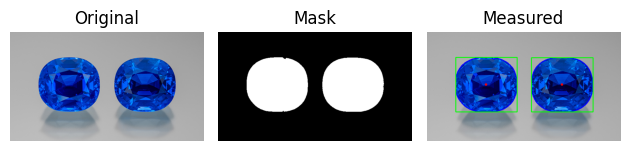

In [8]:
import cv2, numpy as np, matplotlib.pyplot as plt

img = cv2.imread("sapphire.jpg"); hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
m = cv2.inRange(hsv,(95,120,80),(130,255,255))
m = cv2.morphologyEx(m,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
cnts,_ = cv2.findContours(m,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(m); 
for c in sorted(cnts,key=cv2.contourArea)[-2:]: cv2.drawContours(mask,[c],-1,255,-1)

n,lab,st,ctr = cv2.connectedComponentsWithStats(mask)
print("Count:",n-1); 
for i in range(1,n): print(f"Stone {i}: area={st[i,cv2.CC_STAT_AREA]}, centroid={ctr[i]}")

vis = img.copy(); cv2.drawContours(vis,[c for c in sorted(cnts,key=cv2.contourArea)[-2:]],-1,(255,0,0),2)
for i in range(1,n): x,y,w,h,_=st[i]; cx,cy=ctr[i]; cv2.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2); cv2.circle(vis,(int(cx),int(cy)),4,(0,0,255),-1)

plt.subplot(131);plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));plt.title("Original");plt.axis("off")
plt.subplot(132);plt.imshow(mask,cmap="gray");plt.title("Mask");plt.axis("off")
plt.subplot(133);plt.imshow(cv2.cvtColor(vis,cv2.COLOR_BGR2RGB));plt.title("Measured");plt.axis("off")
plt.tight_layout();plt.show()
